In [947]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from streamlit import dataframe

In [948]:
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['Label', 'Message'])

In [949]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [950]:
df.shape

(5572, 2)

In [1038]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvements
# Website
# Deploy Website

## Data Cleaning

In [952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [953]:
df.sample(5)

,Label,Message
3111,spam,Good Luck! Draw takes place 28th Feb 06. Good ...
223,ham,"Sorry, I'll call later"
1012,ham,"I just got home babe, are you still awake ?"
5556,ham,Yes i have. So that's why u texted. Pshew...mi...
3302,spam,RCT' THNQ Adrian for U text. Rgds Vatian


In [954]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [955]:
df['Label'] = encoder.fit_transform(df['Label'])

In [956]:
df.head()
# spam = 1 , not_spam = 0

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [957]:
#check for duplicates
df.duplicated().sum()

np.int64(403)

In [958]:
#remove duplicated values
df = df.drop_duplicates(keep = 'first')

In [959]:
df.duplicated().sum()

np.int64(0)

In [960]:
df.shape

(5169, 2)

## EDA

In [961]:
df['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

In [962]:
import matplotlib.pyplot as plt

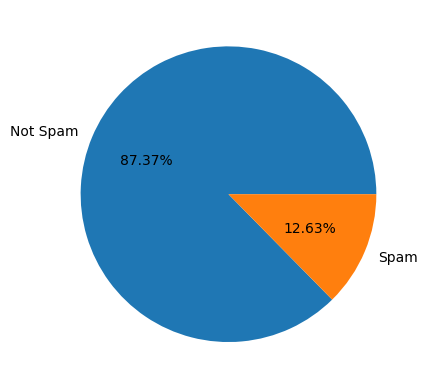

In [963]:
plt.pie(df['Label'].value_counts(),labels =['Not Spam','Spam'],autopct = '%0.2f%%')
plt.show()

In [964]:
import nltk
#natural language toolkit

In [965]:
!pip install nltk


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [966]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\animesh
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\animesh
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\animesh
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [967]:
#punkt is a pre-trained  tokenizer model used to split text into sentences and words

In [968]:
df['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Message, Length: 5169, dtype: int64

In [969]:
df['Count_Characters'] = df['Message'].apply(len)

In [970]:
df.head()

,Label,Message,Count_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [971]:
# lambda function is used to split the whole sentence into a list f words and put them into an array of words

In [972]:
df['Total_Words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [973]:
df.head()

,Label,Message,Count_Characters,Total_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [974]:
df['Total_Sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [975]:
df.head()

,Label,Message,Count_Characters,Total_Words,Total_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [976]:
df[['Count_Characters','Total_Words','Total_Sentences']].describe()

,Count_Characters,Total_Words,Total_Sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [977]:
df[df['Label'] == 0].describe() # NOT-SPAM

,Label,Count_Characters,Total_Words,Total_Sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.905890,17.267715,1.827724
std,0.0,56.715046,13.588065,1.394338
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [978]:
df[df['Label'] == 1].describe() # SPAM

,Label,Count_Characters,Total_Words,Total_Sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.704441,27.762634,2.986217
std,0.0,29.821348,6.993008,1.494815
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


In [979]:
import seaborn as sns

<Axes: xlabel='Count_Characters', ylabel='Count'>

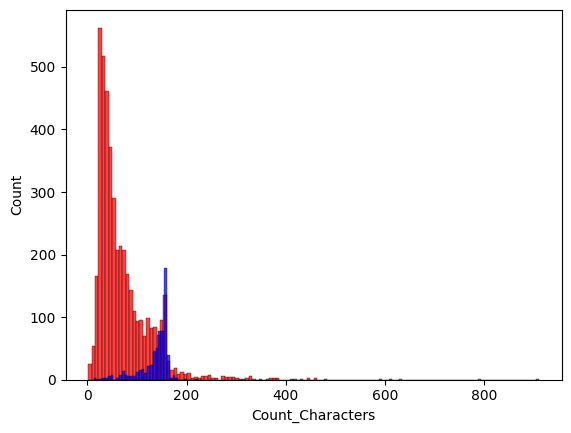

In [980]:
sns.histplot(df[df['Label'] == 0]['Count_Characters'],color = 'r')
sns.histplot(df[df['Label'] == 1]['Count_Characters'],color = 'b')

<Axes: xlabel='Total_Words', ylabel='Count'>

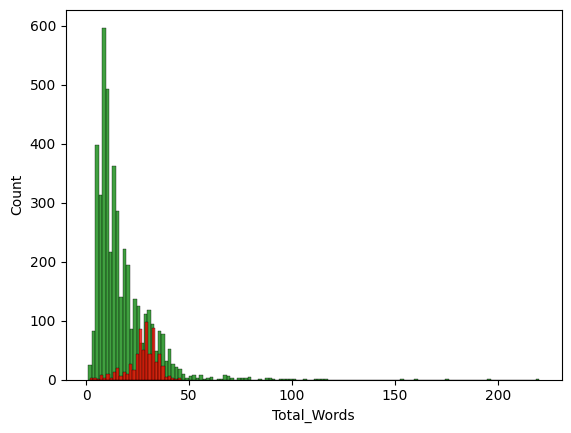

In [981]:
sns.histplot(df[df['Label'] == 0]['Total_Words'],color = 'g')
sns.histplot(df[df['Label'] == 1]['Total_Words'],color = 'r')

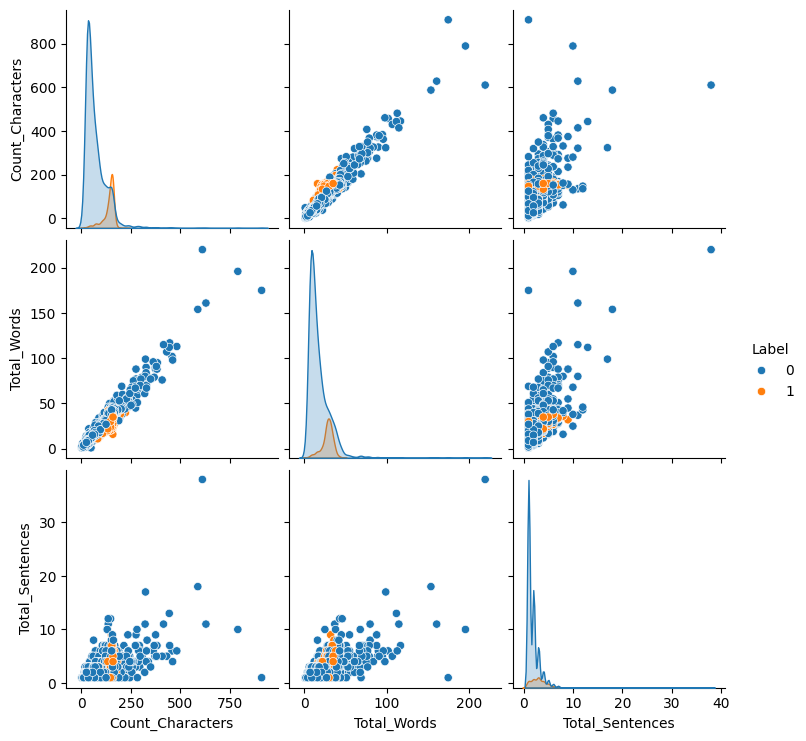

<Figure size 200x400 with 0 Axes>

In [1037]:
sns.pairplot(df,hue = 'Label')
plt.figure(figsize=(2,4))
plt.show()

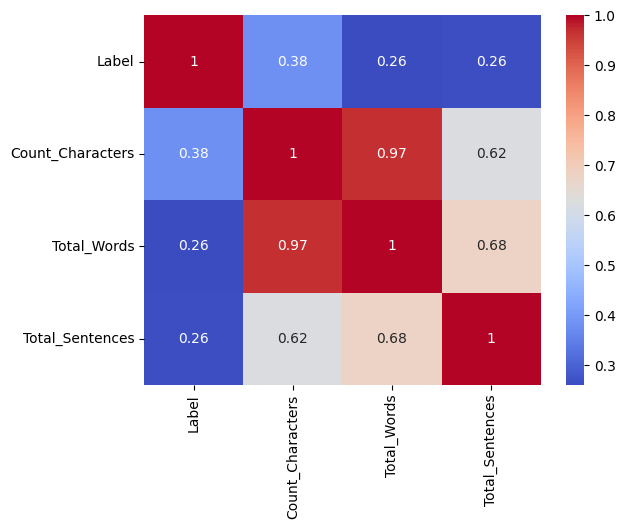

In [983]:
string_df = df.select_dtypes(include = ['number'])
sns.heatmap(string_df.corr(),cmap = 'coolwarm',annot = True)
plt.show()

## Data Preprocessing

In [984]:
# Lower Case
# Sentence to Word List through the use of nlkt tokenization
# Remove special characters
# Remove stop words and punctuation
# Stemming

In [985]:
import string

In [986]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [987]:
def transform_message(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    a = []
    for i in Message:
        if i.isalnum():
            a.append(i)
    Message = a[:]
    a.clear()
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    Message = a[:]
    a.clear()
    for i in Message:
        a.append(ps.stem(i))
    return " ".join(a)

In [988]:
transform_message('Hi i loved yt lectures on machine learning , how about you ?')

'hi love yt lectur machin learn'

In [989]:
df['Transformed_Message'] = df['Message'].apply(transform_message)

In [990]:
df.head()

,Label,Message,Count_Characters,Total_Words,Total_Sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [991]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 800,min_font_size = 10, background_color = 'white')

In [992]:
spam_wc = wc.generate((df[df['Label'] == 1]['Transformed_Message'].str.cat(sep = " ")))


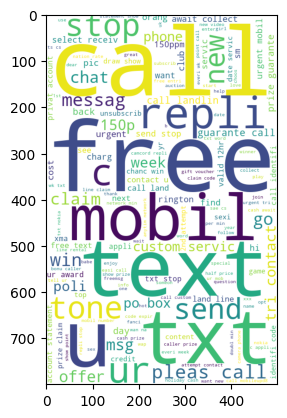

In [993]:
plt.imshow(spam_wc)
plt.show()

In [994]:
non_spam_wc = wc.generate((df[df['Label'] == 0]['Transformed_Message'].str.cat(sep = " ")))


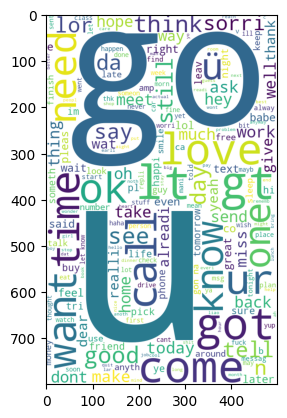

In [995]:
plt.imshow(non_spam_wc)
plt.show()

In [996]:
spam_corpus = []
for msg in df[df['Label'] == 1]['Transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [997]:
len(spam_corpus)

9982

In [998]:
from collections import Counter

In [999]:
spam_words = Counter(spam_corpus).most_common(30)

In [1000]:
df_spam = pd.DataFrame(spam_words,columns = ['Words','Count'])

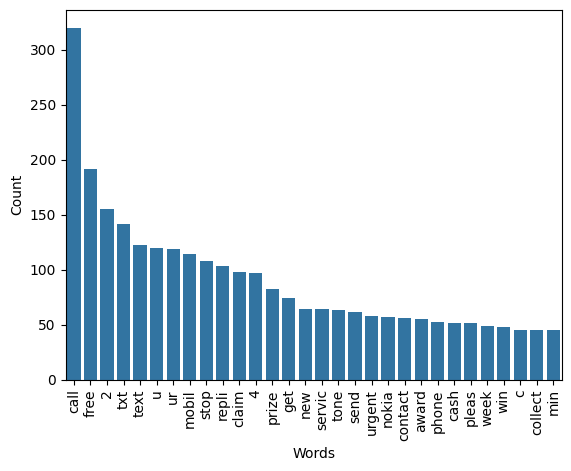

In [1001]:
sns.barplot(x = 'Words', y = 'Count', data = df_spam)
plt.xticks(rotation = 'vertical')
plt.show()

In [1002]:
not_spam_corpus = []
for msg in df[df['Label'] == 0]['Transformed_Message'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [1003]:
len(not_spam_corpus)

35939

In [1004]:
Counter(not_spam_corpus).most_common()

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 124),
 ('hope', 123),
 ('dont', 123),
 ('n', 121),
 ('ask', 121),
 ('sorri', 121),
 ('send', 120),
 ('r', 120),
 ('work', 119),
 ('hi', 116),
 ('meet', 112),
 ('oh', 111),
 ('well', 110),
 ('night', 110),
 ('miss', 109),
 ('much', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('hey', 107),
 ('happi', 106),
 ('give', 105),
 ('later', 100),
 ('great', 97),
 ('na', 96),
 ('wait', 96),
 ('way', 95),
 ('alreadi', 90),
 ('thank', 87),
 ('let', 86),
 ('yeah', 86),
 ('text', 85),
 ('feel

In [1005]:
non_spam_words = Counter(not_spam_corpus).most_common(30)

In [1006]:
df_non_spam = pd.DataFrame(non_spam_words,columns = ['Words','Count'])

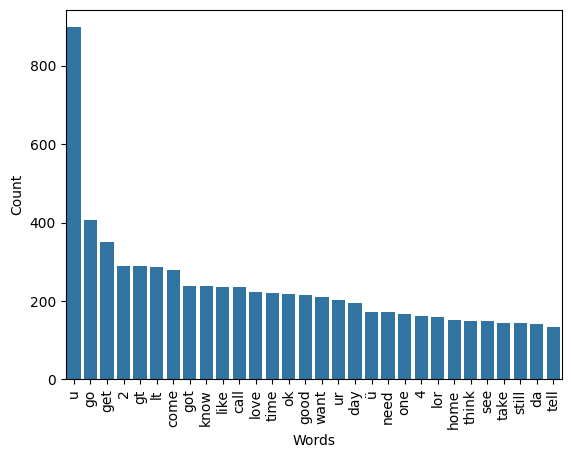

In [1007]:
sns.barplot(x = 'Words', y = 'Count', data = df_non_spam)
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

In [1008]:
# Naive-Bayes Algorithm

In [1009]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [1010]:
x = tfidf.fit_transform(df['Transformed_Message']).toarray()


In [1011]:
x.shape

(5169, 3000)

In [1012]:
y = df['Label'].values

In [1013]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [1014]:
from sklearn.model_selection import train_test_split

In [1015]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [1016]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [1017]:
gnb = GaussianNB()

In [1018]:
mnb = MultinomialNB()

In [1019]:
bnb = BernoulliNB()

In [1020]:
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8694390715667312
[[780 114]
 [ 21 119]]
0.5107296137339056


In [1021]:
# very poor precision score

In [1022]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9748549323017408
[[894   0]
 [ 26 114]]
1.0


In [1023]:
# good precision score

In [1024]:
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9854932301740812
[[894   0]
 [ 15 125]]
1.0


In [1025]:
# very good precision score

In [1026]:
# precision score is priority more than accuracy

In [1027]:
# tfidf -> MNB (Best)

In [1028]:
# Comparing through all model algorithms

In [1029]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


In [1030]:
svc = SVC(kernel='sigmoid', gamma=1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc = XGBClassifier(n_estimators=50,random_state=2)

In [1031]:
classifiers = {
    'SVC' : svc,
    'KNN' : knc,
    'Naive-Bayes' : mnb,
    'DecisionTree' : dtc,
    'LogisticRegression' : lrc,
    'RandomForest' : rfc,
    'GradientBoosting' : gbc,
    'AdaBoost' : abc,
    'Bagging' : bc,
    'ExtraTrees' : etc,
    'XGB' : xgbc
}

In [1032]:
def train_classifier(clf,x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision


In [1033]:
accuracy_scores = []
precision_scores = []
for name,clf in classifiers.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train, x_test ,y_test)
    print("FOR : ",name)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


FOR :  SVC
Accuracy :  0.9738878143133463
Precision :  0.959349593495935
FOR :  KNN
Accuracy :  0.9100580270793037
Precision :  1.0
FOR :  Naive-Bayes
Accuracy :  0.9748549323017408
Precision :  1.0
FOR :  DecisionTree
Accuracy :  0.9381044487427466
Precision :  0.8392857142857143
FOR :  LogisticRegression
Accuracy :  0.9516441005802708
Precision :  0.9245283018867925
FOR :  RandomForest
Accuracy :  0.9806576402321083
Precision :  0.9918032786885246
FOR :  GradientBoosting
Accuracy :  0.9545454545454546
Precision :  0.9603960396039604
FOR :  AdaBoost
Accuracy :  0.925531914893617
Precision :  0.8315789473684211
FOR :  Bagging
Accuracy :  0.965183752417795
Precision :  0.8939393939393939
FOR :  ExtraTrees
Accuracy :  0.9796905222437138
Precision :  0.983739837398374
FOR :  XGB
Accuracy :  0.9690522243713733
Precision :  0.9655172413793104


In [1034]:
perfomance_df = pd.DataFrame({'Algorithm': classifiers.keys(),'Acccuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending = False)
perfomance_df

,Algorithm,Acccuracy,Precision
1,KNN,0.910058,1.000000
2,Naive-Bayes,0.974855,1.000000
5,RandomForest,0.980658,0.991803
9,ExtraTrees,0.979691,0.983740
10,XGB,0.969052,0.965517
6,GradientBoosting,0.954545,0.960396
0,SVC,0.973888,0.959350
4,LogisticRegression,0.951644,0.924528
8,Bagging,0.965184,0.893939
3,DecisionTree,0.938104,0.839286


In [1035]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))

In [1036]:
df.head(10)

,Label,Message,Count_Characters,Total_Words,Total_Sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
